In [1]:
import pandas as pd
import os
pwd = os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import json
import requests

In [2]:

# As a data scientist, your task is to analyze the factors driving the spread of COVID-19 using publicly available data. 
# You are also required to support communication strategies with local stakeholders across Toronto, Calgary, and Vancouver 
# to address disinformation and misinformation about Mpox.

#Q1
df = pd.read_csv(pwd + "/owid-covid-data.csv")
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:

#Q2 
columns_of_interest = [
    'location',  
    'continent', 
    'total_cases',
    'total_deaths',
    'reproduction_rate', 
    'new_vaccinations',  
    'population_density',
    'median_age',
    'aged_65_older',  
    'gdp_per_capita', 
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',  
    'female_smokers',  
    'male_smokers',  
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',  
    'human_development_index',  
    'population'
]
cleaned_df = df[columns_of_interest]
cleaned_df

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,NaN,NaN,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [4]:
#Q3 Handle Missing Values
print(cleaned_df.isnull().sum())
df_no_missingness = cleaned_df.dropna(axis=0)
df_no_missingness


location                           0
continent                      26525
total_cases                    17631
total_deaths                   17631
reproduction_rate             244618
new_vaccinations              358464
population_density             68943
median_age                     94772
aged_65_older                 106165
gdp_per_capita                101143
extreme_poverty               217439
cardiovasc_death_rate         100570
diabetes_prevalence            83524
female_smokers                182270
male_smokers                  185618
handwashing_facilities        267694
hospital_beds_per_thousand    138746
life_expectancy                39136
human_development_index       110308
population                         0
dtype: int64


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
5413,Algeria,Africa,105369.0,2861.0,0.98,30.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5709,Algeria,Africa,208839.0,6017.0,1.17,23526.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
5717,Algeria,Africa,209980.0,6052.0,1.14,147230.0,17.35,29.1,6.21,13913.84,0.5,278.36,6.73,0.7,30.4,83.74,1.9,76.88,0.75,44903228
30534,Bangladesh,Asia,531799.0,8023.0,0.78,26.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
30535,Bangladesh,Asia,531799.0,8023.0,0.78,541.0,1265.04,27.5,5.10,3523.98,14.8,298.00,8.38,1.0,44.7,34.81,0.8,72.59,0.63,171186368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428755,Zimbabwe,Africa,257340.0,5599.0,1.21,3446.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428756,Zimbabwe,Africa,257340.0,5599.0,1.15,2632.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428757,Zimbabwe,Africa,257340.0,5599.0,1.13,11526.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
428762,Zimbabwe,Africa,257517.0,5602.0,1.06,2276.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [5]:
df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())
df_mean_inputation

/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/3436298396.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_inputation = cleaned_df.fillna(cleaned_df.mean())


,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,0.911495,739864.026743,54.42,18.6,2.58,1803.99,13.924729,597.03,9.59,10.772438,33.097758,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,0.911495,739864.026743,42.73,19.6,2.82,1899.78,21.400000,307.85,1.82,1.600000,30.700000,36.79,1.7,61.49,0.57,16320539


In [6]:
df_interpolate = cleaned_df.interpolate()
df_interpolate
#Preferable choice

,location,continent,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
1,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
2,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
3,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
4,Afghanistan,Asia,0.0,0.0,NaN,NaN,54.42,18.6,2.58,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429431,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429432,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539
429433,Zimbabwe,Africa,266386.0,5740.0,0.03,1978.0,42.73,19.6,2.82,1899.78,21.4,307.85,1.82,1.6,30.7,36.79,1.7,61.49,0.57,16320539


In [7]:
#Q4 Plot a Covariance Matrix
df_interpolate.cov()


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/3529908052.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_interpolate.cov()


,total_cases,total_deaths,reproduction_rate,new_vaccinations,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
total_cases,2.000285e+15,1.854088e+13,1.931933e+06,1.146724e+13,-1.747129e+09,9.321000e+06,7.551296e+06,4.593699e+09,-2.585984e+07,-3.309008e+08,-5.537645e+06,-2.178452e+07,-3.797852e+07,-7.507309e+06,-3.347550e+05,1.399639e+07,7.832508e+04,1.986404e+16
total_deaths,1.854088e+13,1.917811e+11,2.483887e+04,1.847347e+11,-1.926127e+07,1.142321e+05,8.279056e+04,6.024097e+07,-3.065980e+05,-3.383958e+06,-6.642620e+04,-2.070418e+05,-4.066423e+05,-1.687085e+05,8.924187e+03,1.112250e+05,1.142341e+03,2.140355e+14
reproduction_rate,1.931933e+06,2.483887e+04,2.943332e-01,3.006334e+04,-1.044940e+01,1.179835e+00,7.710072e-01,2.176061e+03,-1.698646e+00,-8.999776e+00,-4.927789e-02,7.728728e-01,5.071786e-01,7.665061e-01,1.509761e-01,8.028317e-01,2.170283e-02,5.358270e+07
new_vaccinations,1.146724e+13,1.847347e+11,3.006334e+04,1.758419e+12,-2.229852e+07,4.938377e+05,2.911916e+05,6.858824e+08,-6.823624e+05,-2.421654e+06,-4.683558e+04,-3.382543e+05,-1.870230e+05,3.562502e+05,1.616764e+04,1.495564e+05,5.524661e+03,4.444709e+14
population_density,-1.747129e+09,-1.926127e+07,-1.044940e+01,-2.229852e+07,2.685314e+06,1.529063e+03,3.712384e+02,5.907837e+06,6.479053e+02,1.960570e+03,-1.548527e+02,-2.786721e+02,8.362140e+02,2.688539e+03,7.773269e+02,2.354765e+03,1.702316e+01,-2.842043e+10
median_age,9.321000e+06,1.142321e+05,1.179835e+00,4.938377e+05,1.529063e+03,7.675548e+01,4.499346e+01,1.008252e+05,-7.482062e+01,-2.792694e+02,3.164306e+00,3.843361e+01,1.872278e+01,6.682525e+01,9.814028e+00,4.576466e+01,1.049990e+00,5.617786e+08
aged_65_older,7.551296e+06,8.279056e+04,7.710072e-01,2.911916e+05,3.712384e+02,4.499346e+01,3.367607e+01,5.725219e+04,-4.061948e+01,-2.008344e+02,-2.447974e+00,3.233575e+01,7.923447e+00,2.329890e+01,6.625197e+00,2.619720e+01,6.298563e-01,3.828518e+08
gdp_per_capita,4.593699e+09,6.024097e+07,2.176061e+03,6.858824e+08,5.907837e+06,1.008252e+05,5.725219e+04,3.902406e+08,-1.060271e+05,-9.684612e+05,7.159581e+03,4.885980e+04,-1.904209e+04,4.906835e+04,9.851400e+03,8.497464e+04,1.961139e+03,1.502881e+12
extreme_poverty,-2.585984e+07,-3.065980e+05,-1.698646e+00,-6.823624e+05,6.479053e+02,-7.482062e+01,-4.061948e+01,-1.060271e+05,3.285897e+02,1.682145e+02,-1.702733e+01,-3.288862e+01,-2.844084e+01,-1.881727e+02,-9.944832e+00,-5.767316e+01,-1.381507e+00,-8.843388e+08
cardiovasc_death_rate,-3.309008e+08,-3.383958e+06,-8.999776e+00,-2.421654e+06,1.960570e+03,-2.792694e+02,-2.008344e+02,-9.684612e+05,1.682145e+02,1.302084e+04,6.133557e+01,-1.117445e+02,4.432067e+02,-2.095312e+02,6.928704e+00,-3.285693e+02,-6.634575e+00,-3.984024e+09


/var/folders/yz/bzv2zlpn4_z0_9r8fnhznf7h0000gn/T/ipykernel_89430/811020990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_interpolate.corr()


                            total_cases  total_deaths  reproduction_rate  \
total_cases                    1.000000      0.946633           0.079613   
total_deaths                   0.946633      1.000000           0.104537   
reproduction_rate              0.079613      0.104537           1.000000   
new_vaccinations               0.193242      0.317933           0.041773   
population_density            -0.023839     -0.026840          -0.011753   
median_age                     0.023788      0.029774           0.248245   
aged_65_older                  0.029095      0.032577           0.244896   
gdp_per_capita                 0.005199      0.006963           0.203038   
extreme_poverty               -0.031775     -0.038482          -0.172122   
cardiovasc_death_rate         -0.064838     -0.067718          -0.145484   
diabetes_prevalence           -0.025667     -0.031444          -0.018828   
female_smokers                -0.049816     -0.048362           0.145748   
male_smokers

<AxesSubplot: >

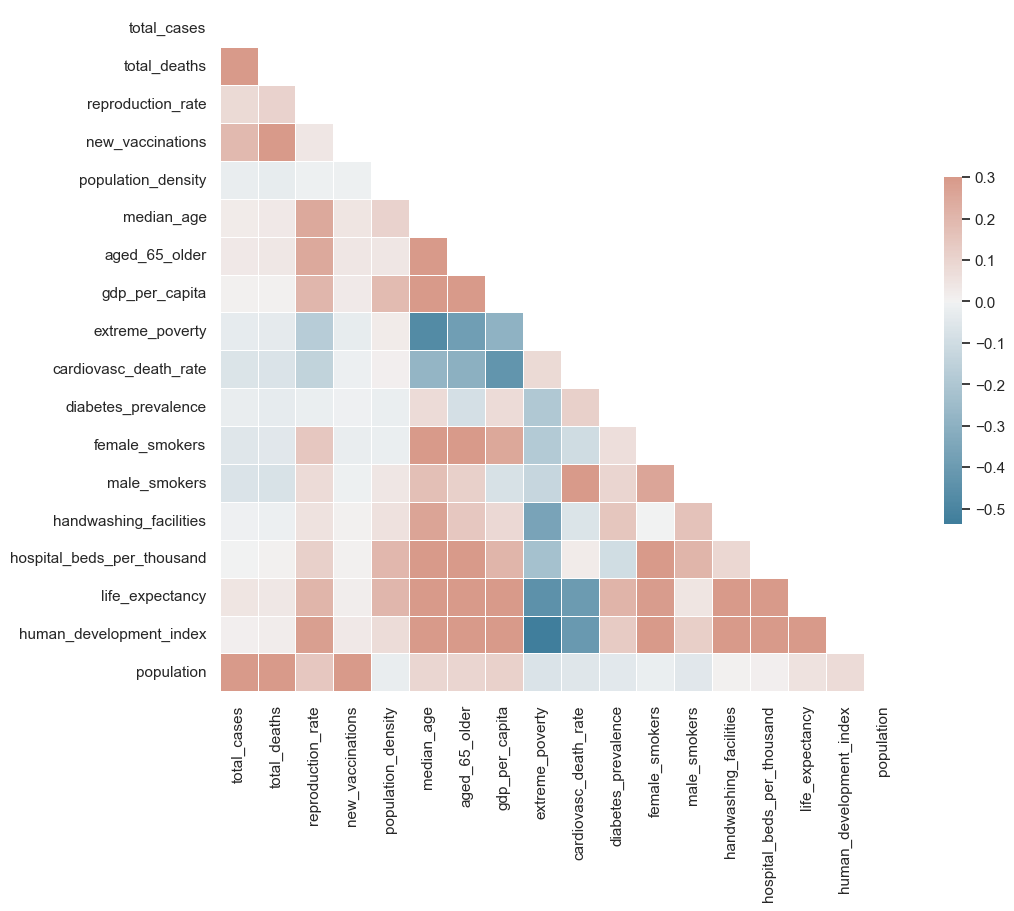

In [8]:
#Plotting a Correlation Matrix
corr = df_interpolate.corr()
print(corr)

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [9]:
#Project 2: Analyzing Public Concerns About Mpox
#Q1 Data Collection and Analysis

# url = 'https://api.pullpush.io/reddit/search/comment/?q=Mpox|Monkeypox|M-pox&subreddit=Toronto,Calgary,Vancouver&after=1723617600&before=1727330400'
url = 'https://api.pullpush.io/reddit/search/comment/?q=Mpox&subreddit=Toronto&after=1723617600&before=1727330400'

# url = 'https://api.pullpush.io/reddit/search/comment/?q=covid&subreddit=toronto&after=1722312000&before=1724904000'

JSONContent = requests.get(url).json()
JSONContent

{'data': [{'subreddit_id': 't5_2qi63',
   'approved_at_utc': None,
   'author_is_blocked': False,
   'comment_type': None,
   'edited': False,
   'mod_reason_by': None,
   'banned_by': None,
   'ups': 1,
   'num_reports': None,
   'author_flair_type': 'text',
   'total_awards_received': 0,
   'subreddit': 'toronto',
   'author_flair_template_id': None,
   'likes': None,
   'replies': '',
   'user_reports': [],
   'saved': False,
   'id': 'lihfoke',
   'banned_at_utc': None,
   'mod_reason_title': None,
   'gilded': 0,
   'archived': False,
   'collapsed_reason_code': None,
   'no_follow': True,
   'author': 'truth-4-sale',
   'can_mod_post': False,
   'send_replies': True,
   'parent_id': 't3_1erf76u',
   'score': 1,
   'author_fullname': 't2_1q596sb9',
   'report_reasons': None,
   'removal_reason': None,
   'approved_by': None,
   'all_awardings': [],
   'body': 'Mpox: What are the symptoms, and how does it spread? \n\nGlobal News\n\nhttps://www.youtube.com/watch?v=-at4b-8D8xs',
   '

In [10]:
# Initialize an Empty DataFrame
data = pd.DataFrame()

# Check for 'data' Key and Create DataFrame from 'data' Key
if 'data' in list(JSONContent.keys()):
    data = pd.DataFrame.from_records(JSONContent['data'])

pd.set_option('display.max_columns', None)
data.head(100)


,subreddit_id,approved_at_utc,author_is_blocked,comment_type,edited,mod_reason_by,banned_by,ups,num_reports,author_flair_type,total_awards_received,subreddit,author_flair_template_id,likes,replies,user_reports,saved,id,banned_at_utc,mod_reason_title,gilded,archived,collapsed_reason_code,no_follow,author,can_mod_post,send_replies,parent_id,score,author_fullname,report_reasons,removal_reason,approved_by,all_awardings,body,awarders,top_awarded_type,downs,author_flair_css_class,author_patreon_flair,collapsed,author_flair_richtext,is_submitter,body_html,gildings,collapsed_reason,associated_award,stickied,author_premium,can_gild,link_id,unrepliable_reason,author_flair_text_color,score_hidden,permalink,subreddit_type,locked,name,created,author_flair_text,treatment_tags,created_utc,subreddit_name_prefixed,controversiality,author_flair_background_color,collapsed_because_crowd_control,mod_reports,mod_note,distinguished
0,t5_2qi63,None,False,None,False,None,None,1,None,text,0,toronto,None,None,,[],False,lihfoke,None,None,0,False,None,True,truth-4-sale,False,True,t3_1erf76u,1,t2_1q596sb9,None,None,None,[],"Mpox: What are the symptoms, and how does it s...",[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;Mpox: What are ...",{},None,None,False,False,False,t3_1erf76u,None,None,True,/r/toronto/comments/1erf76u/toronto_public_hea...,public,False,t1_lihfoke,1.723849e+09,None,[],1.723849e+09,r/toronto,0,None,None,[],None,None
1,t5_2qi63,None,False,None,False,None,None,1,None,text,0,toronto,None,None,,[],False,licd7jg,None,None,0,False,None,True,NegotiationKooky532,False,True,t3_1eshvkw,1,t2_pqa84j82,None,None,None,[],Mpox protest or blackout anniversary,[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;Mpox protest or...",{},None,None,False,False,False,t3_1eshvkw,None,None,True,/r/toronto/comments/1eshvkw/party_or_protest/l...,public,False,t1_licd7jg,1.723775e+09,None,[],1.723775e+09,r/toronto,0,None,None,[],None,None
2,t5_2qi63,None,False,None,False,None,None,1,None,text,0,toronto,dd0deda2-5248-11e3-ae49-12313b079641,None,,[],False,li3j5tj,None,None,0,False,None,True,thecjm,False,True,t1_li3h2mx,1,t2_8d1og,None,None,None,[],There are racial/racist connotations to callin...,[],None,0,the-annex,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;There are racia...",{},None,None,False,False,False,t3_1es5wzr,None,dark,True,/r/toronto/comments/1es5wzr/toronto_public_hea...,public,False,t1_li3j5tj,1.723654e+09,The Annex,[],1.723654e+09,r/toronto,0,None,None,[],None,None
3,t5_2qi63,None,False,None,False,None,None,1,None,text,0,toronto,None,None,,[],False,li3h2mx,None,None,0,False,None,True,Yaguajay,False,True,t3_1es5wzr,1,t2_520qcuvrk,None,None,None,[],TPH specified “for all eligible people.” Is t...,[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;TPH specified “...",{},None,None,False,False,False,t3_1es5wzr,None,None,True,/r/toronto/comments/1es5wzr/toronto_public_hea...,public,False,t1_li3h2mx,1.723653e+09,None,[],1.723653e+09,r/toronto,0,None,None,[],None,None


In [14]:
subreddits = ['toronto', 'calgary', 'vancouver']
search_terms = ['Mpox', 'Monkeypox', 'M-pox']

after = '1723617600'  # UNIX timestamp for August 14, 2024
before = '1727330400'  # UNIX timestamp for current date (Sept 26, 2024)

for subreddit in subreddits:
    for term in search_terms:
        url = f'https://api.pullpush.io/reddit/search/comment/?q={term}&subreddit={subreddit}&after={after}&before={before}'
        
        response = requests.get(url)
        
        # Check if the request was successful
        if response.status_code == 200:
            # Process the response (you can print or save the result)
            JSONContent = response.json()
            print(f'Results for {term} in {subreddit}:', JSONContent)
        else:
            print(f"Error fetching data for {term} in {subreddit}")

Results for Mpox in toronto: {'data': [{'subreddit_id': 't5_2qi63', 'approved_at_utc': None, 'author_is_blocked': False, 'comment_type': None, 'edited': False, 'mod_reason_by': None, 'banned_by': None, 'ups': 1, 'num_reports': None, 'author_flair_type': 'text', 'total_awards_received': 0, 'subreddit': 'toronto', 'author_flair_template_id': None, 'likes': None, 'replies': '', 'user_reports': [], 'saved': False, 'id': 'lihfoke', 'banned_at_utc': None, 'mod_reason_title': None, 'gilded': 0, 'archived': False, 'collapsed_reason_code': None, 'no_follow': True, 'author': 'truth-4-sale', 'can_mod_post': False, 'send_replies': True, 'parent_id': 't3_1erf76u', 'score': 1, 'author_fullname': 't2_1q596sb9', 'report_reasons': None, 'removal_reason': None, 'approved_by': None, 'all_awardings': [], 'body': 'Mpox: What are the symptoms, and how does it spread? \n\nGlobal News\n\nhttps://www.youtube.com/watch?v=-at4b-8D8xs', 'awarders': [], 'top_awarded_type': None, 'downs': 0, 'author_flair_css_class

In [54]:
url = 'https://api.pullpush.io/reddit/search/comment/?q=pox&subreddit=canada&after=1723617600&before=1727330400'

# url = 'https://api.pullpush.io/reddit/search/comment/?q=covid&subreddit=toronto&after=1722312000&before=1724904000'

JSONContent = requests.get(url).json()
JSONContent
# Initialize an Empty DataFrame
data = pd.DataFrame()

# Check for 'data' Key and Create DataFrame from 'data' Key
if 'data' in list(JSONContent.keys()):
    data = pd.DataFrame.from_records(JSONContent['data'])

pd.set_option('display.max_columns', None)
data.head(100)

,subreddit_id,approved_at_utc,author_is_blocked,comment_type,edited,mod_reason_by,banned_by,ups,num_reports,author_flair_type,total_awards_received,subreddit,author_flair_template_id,likes,replies,user_reports,saved,id,banned_at_utc,mod_reason_title,gilded,archived,collapsed_reason_code,no_follow,author,can_mod_post,send_replies,parent_id,score,author_fullname,report_reasons,removal_reason,approved_by,all_awardings,body,awarders,top_awarded_type,downs,author_flair_css_class,author_patreon_flair,collapsed,author_flair_richtext,is_submitter,body_html,gildings,collapsed_reason,associated_award,stickied,author_premium,can_gild,link_id,unrepliable_reason,author_flair_text_color,score_hidden,permalink,subreddit_type,locked,name,created,author_flair_text,treatment_tags,created_utc,subreddit_name_prefixed,controversiality,author_flair_background_color,collapsed_because_crowd_control,mod_reports,mod_note,distinguished
0,t5_2qh68,None,False,None,False,None,None,1,None,text,0,canada,None,None,,[],False,lnlss9r,None,None,0,False,None,True,Otherwise-Medium3145,False,True,t1_lnlrng9,1,t2_mlkwmonql,None,None,None,[],"Only to anti science folk. The folks who listen to doctors and trust science have no problems with vaccines. Vaccines are the miracle modern medicine. If monkey pox comes to Canada, will you get a vaccine? I hear polio is on its way back because of antivaxxers, will you let your child catch polio?",[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;Only to anti science folk. The folks who listen to doctors and trust science have no problems with vaccines. Vaccines are the miracle modern medicine. If monkey pox comes to Canada, will you get a vaccine? I hear polio is on its way back because of antivaxxers, will you let your child catch polio?&lt;/p&gt;\n&lt;/div&gt;",{},None,None,False,False,False,t3_1fj3ds7,None,None,True,/r/canada/comments/1fj3ds7/health_canada_approves_modernas_covid19_vaccine/lnlss9r/,public,False,t1_lnlss9r,1.726596e+09,None,[],1.726596e+09,r/canada,0,None,None,[],None,None
1,t5_2qh68,None,False,None,False,None,None,1,None,text,0,canada,None,None,,[],False,llilbj8,None,None,0,False,None,True,verdasuno,False,True,t3_1f8wplw,1,t2_6qdbwhvt,None,None,None,[],"Honestly Pierre P. doesn’t deserve to be anywhere near the levers of power. \n\nIf Trudeau wasn’t so lame and had enough brain cells to realize his time was up, we might have a decent alternative to vote for. The NDP has been a spectacular lame duck too. \n\nA pox on all their houses. I’m trying something new like the Future Party next election.",[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;Honestly Pierre P. doesn’t deserve to be anywhere near the levers of power. &lt;/p&gt;\n\n&lt;p&gt;If Trudeau wasn’t so lame and had enough brain cells to realize his time was up, we might have a decent alternative to vote for. The NDP has been a spectacular lame duck too. &lt;/p&gt;\n\n&lt;p&gt;A pox on all their houses. I’m trying something new like the Future Party next election. &lt;/p&gt;\n&lt;/div&gt;",{},None,None,False,False,False,t3_1f8wplw,None,None,True,/r/canada/comments/1f8wplw/canadians_call_out_pierre_poilievre_for/llilbj8/,public,False,t1_llilbj8,1.725479e+09,None,[],1.725479e+09,r/canada,0,None,None,[],None,None
2,t5_2qh68,None,False,None,False,None,None,1,None,text,0,canada,None,None,,[],False,lky03vz,None,None,0,False,None,True,Krumm34,False,True,t1_lkxqu91,1,t2_1g39yydq,None,None,None,[],"Ya I was out of elementary before 97, we didnt get vaccinated in high-school. There wasn't a chicken pox Vax back then either.",[],None,0,None,False,False,[],False,"&lt;div class=""md""&gt;&lt;p&gt;Ya I was out of elementary before 97, we didnt get vaccinated in high-school. There wasn&amp;#39;t a chicken pox Vax back then either.&lt;/p&gt;\n&lt;/div&gt;",{},None,None,False,False,False,t3_1f5kug2,None,None,True,/r/canada/comments/1f5kug2/whooping_cough_cases_are_soaring_to_new_heights/lky03vz/,public,False,t1_lky03vz,1.7251

In [55]:
data.shape

(24, 69)

In [79]:
# import urllib.parse

# query = 'mpox (subreddit:toronto OR subreddit:vancouver OR subreddit:calgary)'
# encoded_query = urllib.parse.quote(query)

# url = f'https://api.pullpush.io/reddit/search/comment/?q={encoded_query}&after=1723617600&before=1727330400'
# url = 'https://api.pullpush.io/reddit/search/submission/?q=mpox+(subreddit:canada OR subreddit:toronto)&after=1723617600&before=1727330400'
url = 'https://api.pullpush.io/reddit/search/submission/?q=mpox&subreddit=vancouver&after=1722312000&before=1724904000'
url = 'https://api.pullpush.io/reddit/search/submission/?q=mpox&subreddit=Canada'


JSONContent = requests.get(url).json()
JSONContent

# Initialize an Empty DataFrame
data = pd.DataFrame()

# Check for 'data' Key and Create DataFrame from 'data' Key
if 'data' in list(JSONContent.keys()):
    data = pd.DataFrame.from_records(JSONContent['data'])

pd.set_option('display.max_columns', None)
data


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,subreddit_type,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,mod_note,distinguished,subreddit_id,author_is_blocked,mod_reason_by,num_reports,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_created_utc,retrieved_on
0,NaN,canada,,t2_5smfrha6,False,NaN,0,False,"Canada to donate up to 200,000 vaccine doses to combat mpox outbreaks in Africa","[{'a': ':Canada:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/7pr3b9g1fyv11_t5_2qh68/Canada'}, {'e': 'text', 't': ' National News'}]",r/canada,False,6,m-National News,0.0,93.0,None,True,t3_1ffx97r,False,dark,1.00,None,1.0,0,{},140.0,None,False,[],None,False,False,None,{},:Canada: National News,False,1,NaN,False,False,https://b.thumbs.redditmedia.com/niX0uOb6VJrqLTkBuYayPmpiLqJcGALLOxAZ0u2R7zg.jpg,False,None,[],{},link,None,False,public,1.726241e+09,richtext,6,None,None,text,halifax.citynews.ca,False,None,NaN,None,NaN,https://halifax.citynews.ca/2024/09/13/canada-to-donate-up-to-200000-vaccine-doses-to-combat-mpox-outbreaks-in-africa/,None,False,True,False,False,False,"{'images': [{'source': {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?auto=webp&amp;s=69750459c27ba73107be8025352d11f10ddea834', 'width': 1400, 'height': 933}, 'resolutions': [{'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=108&amp;crop=smart&amp;auto=webp&amp;s=9f468f1ba4e7a90db20a1a03b66c84a1af9afb7c', 'width': 108, 'height': 71}, {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=216&amp;crop=smart&amp;auto=webp&amp;s=2dd8bd5404796913d5dcf5a34c507b66340e476b', 'width': 216, 'height': 143}, {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=320&amp;crop=smart&amp;auto=webp&amp;s=7403eb0dad35236f1f85081fc1075c02e8b1e4dc', 'width': 320, 'height': 213}, {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=640&amp;crop=smart&amp;auto=webp&amp;s=8f5905706d954afe895f021199c9ebde4da652bb', 'width': 640, 'height': 426}, {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=960&amp;crop=smart&amp;auto=webp&amp;s=62921d404e0706471a884b2587f48887dfb2df41', 'width': 960, 'height': 639}, {'url': 'https://external-preview.redd.it/4ieqpzwbHdgfiVj_po4Rx3WcGT5au3FV6c-_ALAAubM.jpg?width=1080&amp;crop=smart&amp;auto=webp&amp;s=9b721e3b3206498a273261f1a9a71e23e54ce406', 'width': 1080, 'height': 719}], 'variants': {}, 'id': 'eSRpbNCT6zVF2q-c8_UxJyjtZsa1VowMzqSby5oqFKI'}], 'enabled': False}",[],[],False,eb1801e6-11fa-11e8-9baf-0e3363fda33e,False,False,False,None,[],False,None,NaN,None,t5_2qh68,False,NaN,Na

In [80]:
pd.set_option('display.max_colwidth', None)
data.permalink

0     /r/canada/comments/1ffx97r/canada_to_donate_up_to_200000_vaccine_doses_to/
1     /r/canada/comments/1ffx7eq/canada_to_donate_up_to_200000_vaccine_doses_to/
2    /r/canada/comments/1eu5oxb/only_a_matter_of_time_before_fastspreading_mpox/
3         /r/canada/comments/1esar7v/who_declares_mpox_outbreak_a_global_health/
4         /r/canada/comments/1esar7v/who_declares_mpox_outbreak_a_global_health/
5       /r/canada/comments/1es9kq8/who_names_mpox_a_global_health_emergency_for/
6       /r/canada/comments/1erfcg0/toronto_public_health_urges_vaccinations_for/
7     /r/canada/comments/1bjl4jp/toronto_reports_21_mpox_cases_so_far_this_year/
8         /r/canada/comments/13txo0n/3_tickborne_diseases_mpox_added_to_list_of/
9       /r/canada/comments/zx1pr0/public_health_buyin_from_gay_and_bisexual_men/
Name: permalink, dtype: object